downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


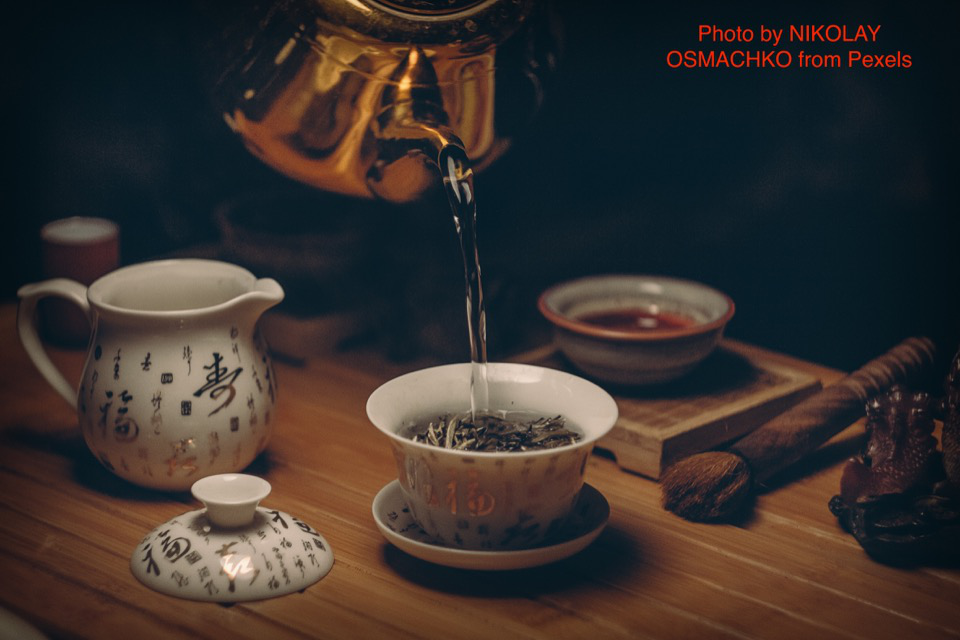

In [0]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

# Task1
 Запрограмувати алгоритм пошуку еліпса  по 6+ точках. Побудувати графік, як залежить максимальне відхилення знайденого еліпса від очікуваного від нормально розподіленої похибки у заданих точках.

(5, 2)


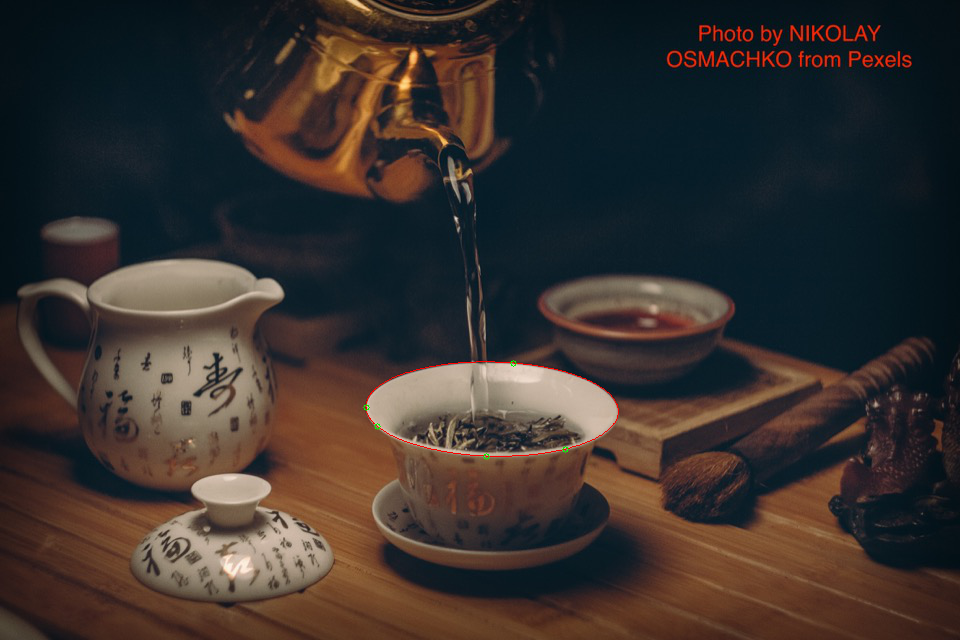

In [0]:
def findEllipse(img, points, useSVD = False):
  img = img.copy()

  if useSVD:
    m = np.zeros((len(points),6))
    for k in range(len(points)):
      m[k][0] = points[k][0] ** 2
      m[k][1] = 2*points[k][0]*points[k][1]
      m[k][2] = points[k][1]*points[k][1]
      m[k][3] = 2*points[k][0]
      m[k][4] = 2*points[k][1]
      m[k][5] = 1

    # Find E matrix using SVD
    mu, ms, mv = np.linalg.svd(m)
    R = mv[5, :]
    R /= R[0]

    E = np.array(
      [[R[0], R[1], R[3]],
        [R[1], R[2], R[4]],
        [R[3], R[4], R[5]]], np.double)
  else:
    points = points[:5, :]
    print(points.shape)
    m = np.zeros((len(points),5))
    r = np.zeros((len(points), 1))
    for k in range(0, len(points)):
      m[k][0] = 2*points[k][0]*points[k][1]
      m[k][1] = points[k][1]*points[k][1]
      m[k][2] = 2*points[k][0]
      m[k][3] = 2*points[k][1]
      m[k][4] = 1
      r[k] = points[k][0]*points[k][0]

    # Use 5 points method
    p = -np.matmul(np.linalg.inv(m), r)
    E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

  # print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

  # result on given points:
  # for k in range(0, len(points)):
    # print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
  #find circle->ellipse conversion
  u, s, v = np.linalg.svd(E)
  u2 = np.matmul(u, np.diag(np.sqrt(s)) )
  H = np.linalg.inv( u2.T)

  # print( "u = ", u )
  # print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

  # print( "v = ", v )
  # print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )

  # draw ellipse
  for alpha in range(0,360):
    a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1 = (a1/a1[2])
    a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2 = (a2/a2[2])
    cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

  for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
  cv2_imshow(img)

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449]], np.double)
findEllipse(imgc, points, False)

##Lets check how SVD approach is tolerant to points change comparing to 5 points method

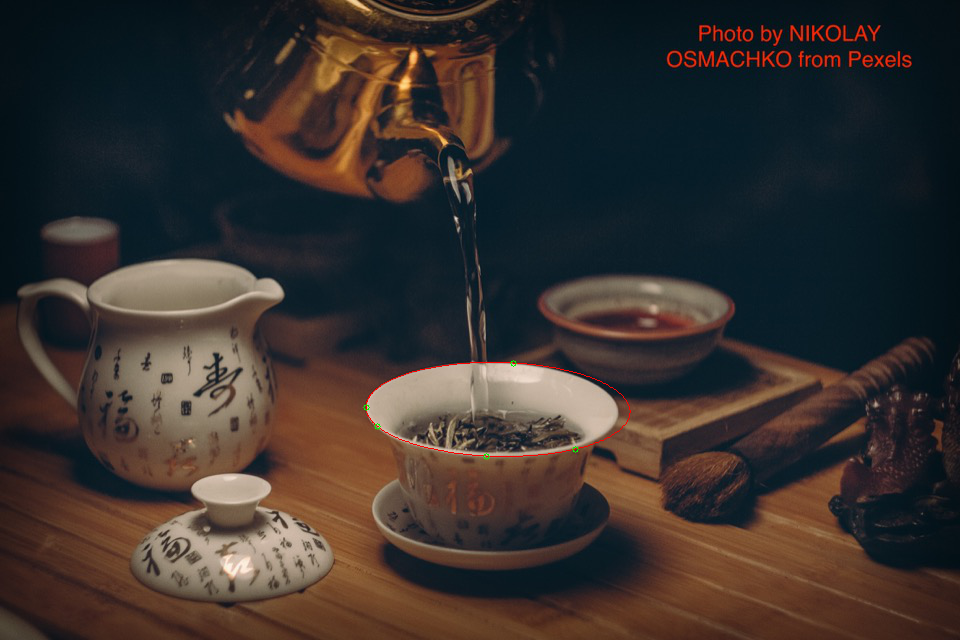

(5, 2)


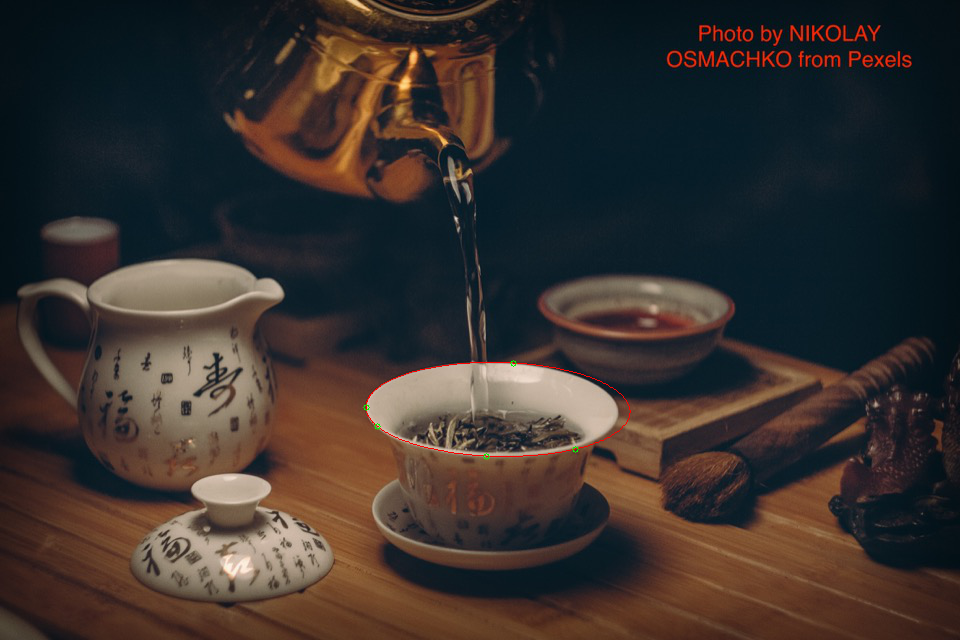

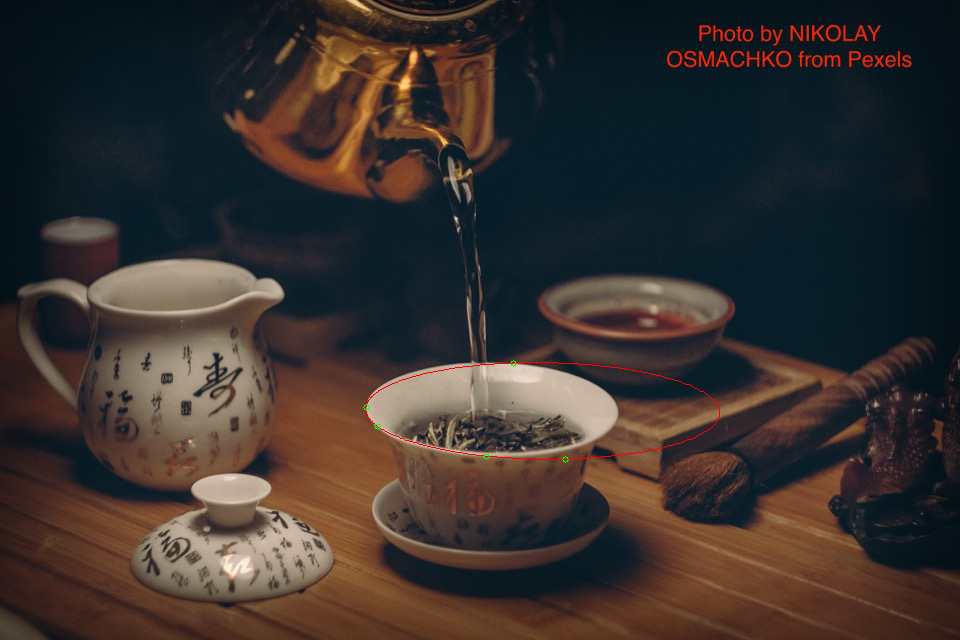

(5, 2)


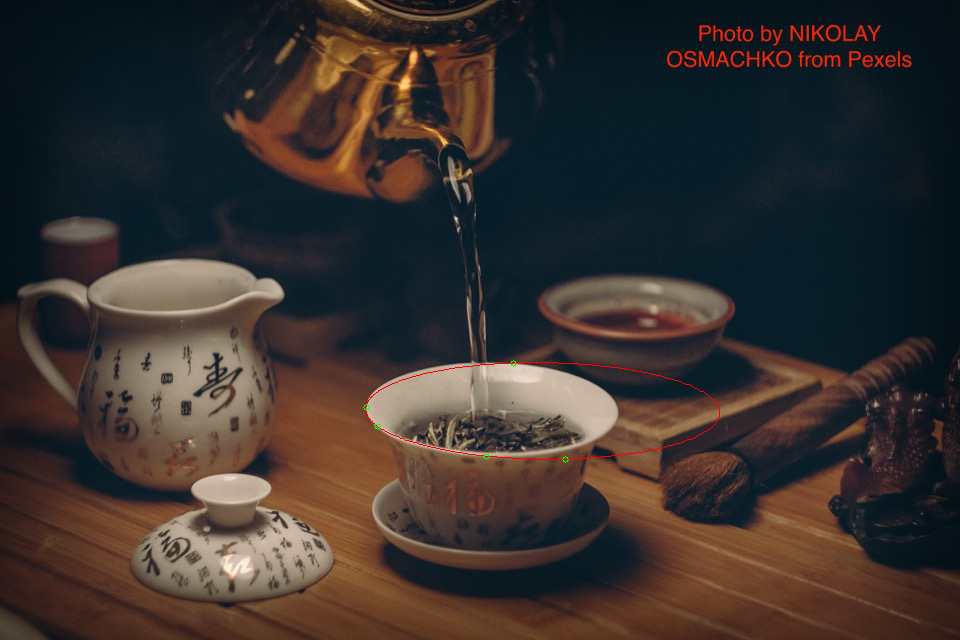

In [0]:
#add move point on X- axis
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565+10, 449]], np.double)

# compare results
findEllipse(imgc, points, True)
findEllipse(imgc, points, False)

#add move point on Y- axis
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449+10]], np.double)

# compare results
findEllipse(imgc, points, True)
findEllipse(imgc, points, False)

## Conclusions 1
As we can see on pictucre having only 5 points produce the same result with both methods. Changes over X-axis create much lower shift in ellipses size than changes on Y-axis.

Let's try to add one more point and compare 5-point to 6-point methods robustnes.

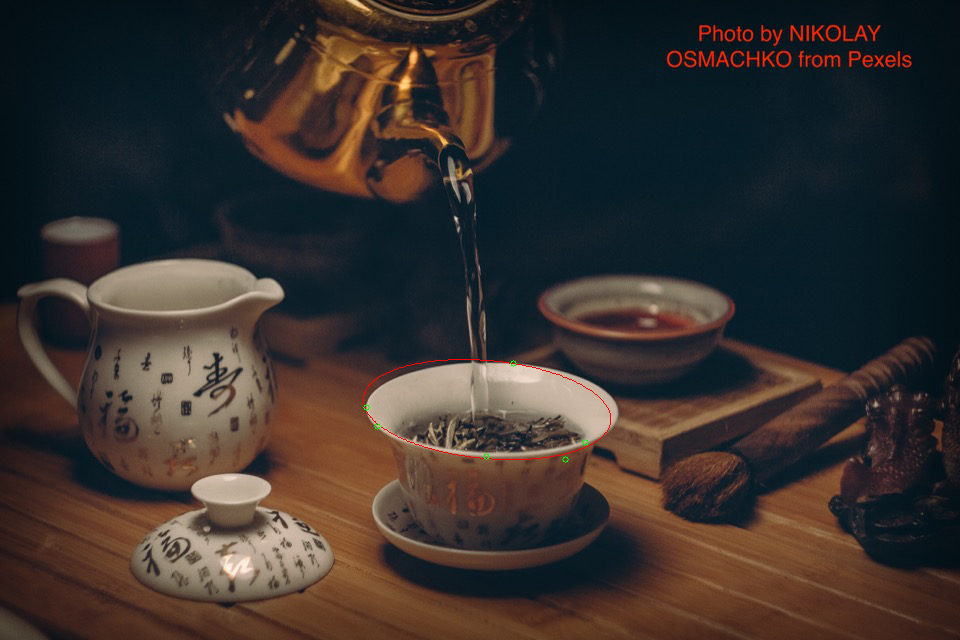

(5, 2)


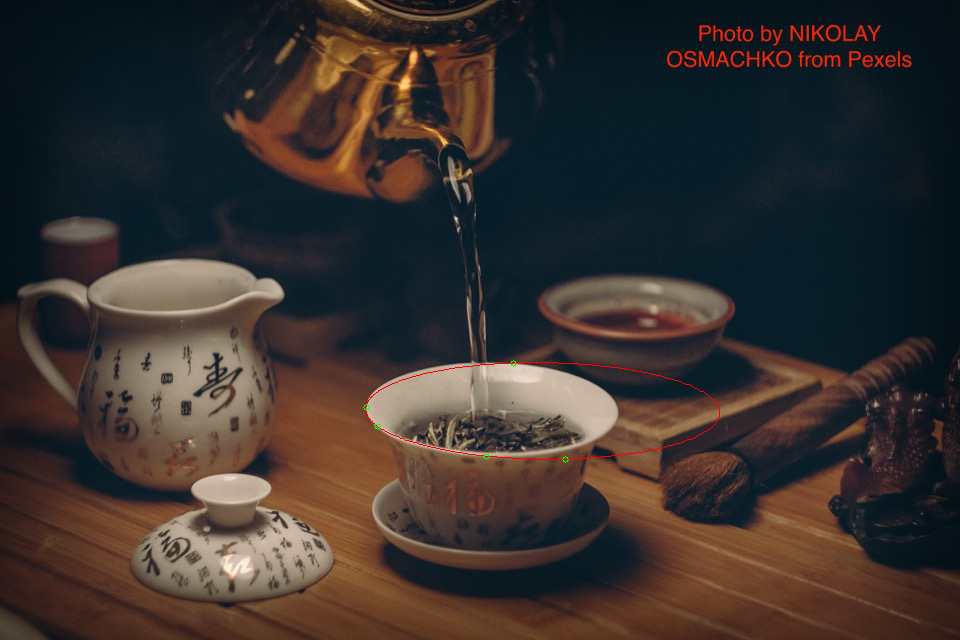

In [0]:
#add move point on Y- axis
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449 + 10], [585, 442]], np.double)

# compare results
findEllipse(imgc, points, True)
findEllipse(imgc, points, False)

## Conclusion 2
As we can see the method with multiple points vs 5-points shows to be much more robust to measurement error. It is safe to assume that robustness will improve with increase of points count. 